In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv("Tesla_stock_data.csv")   

In [6]:
df.head()

,Date,Close,High,Low,Open,Volume
0,2010-06-29,1.592667,1.666667,1.169333,1.266667,281494500
1,2010-06-30,1.588667,2.028000,1.553333,1.719333,257806500
2,2010-07-01,1.464000,1.728000,1.351333,1.666667,123282000
3,2010-07-02,1.280000,1.540000,1.247333,1.533333,77097000
4,2010-07-06,1.074000,1.333333,1.055333,1.333333,103003500


In [7]:
data = df[['Close']].values

In [9]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(data)

In [10]:
train_size = int(len(scaled_data) * 0.8)   # 80% train, 20% test
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size-60:]

In [11]:
def create_sequence(data, window_size=60):
    X, y = [], []
    for i in range(window_size, len(data)):
        X.append(data[i-window_size:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

In [12]:
window_size = 60
X_train, y_train = create_sequence(train_data, window_size)
X_test, y_test = create_sequence(test_data, window_size)

In [13]:
# reshape to 3D (samples, timesteps, features)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

In [14]:
model = Sequential([
    LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    Dropout(0.2),
    LSTM(units=50, return_sequences=True),
    Dropout(0.2),
    LSTM(units=50),
    Dropout(0.2),
    Dense(units=1)
])

C:\tenserflow project\tfvenv\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [15]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [16]:
model.fit(X_train, y_train, epochs=20, batch_size=32, verbose=1)

Epoch 1/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 7s 49ms/step - loss: 0.0108
Epoch 2/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 5s 49ms/step - loss: 0.0011
Epoch 3/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 5s 52ms/step - loss: 8.8260e-04
Epoch 4/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 5s 49ms/step - loss: 0.0012
Epoch 5/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 5s 53ms/step - loss: 0.0010    
Epoch 6/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 5s 50ms/step - loss: 0.0011
Epoch 7/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 5s 53ms/step - loss: 0.0013
Epoch 8/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 5s 53ms/step - loss: 5.9929e-04
Epoch 9/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 5s 52ms/step - loss: 7.6675e-04
Epoch 10/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 5s 54ms/step - loss: 7.4173e-04
Epoch 11/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 5s 48ms/step - loss: 5.4351e-04
Epoch 12/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 5s 50ms/step - loss: 8.0991e-04
Epoch 13/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 5s 50ms/step - loss: 6.2257e-04
Epoch 14/20
94/94 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - loss: 4.8292e-04
Epoch 15/20
94/94 ━━━━━━━━━━━━━━━━━

In [17]:
pred_scaled = model.predict(X_test)

24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step 


In [18]:
predictions = scaler.inverse_transform(pred_scaled)
y_test_rescaled = scaler.inverse_transform(y_test.reshape(-1,1))

In [19]:
rmse = np.sqrt(mean_squared_error(y_test_rescaled, predictions))
mae = mean_absolute_error(y_test_rescaled, predictions)

print("RMSE:", rmse)
print("MAE :", mae)

RMSE: 26.296868400121493
MAE : 22.696270014077385


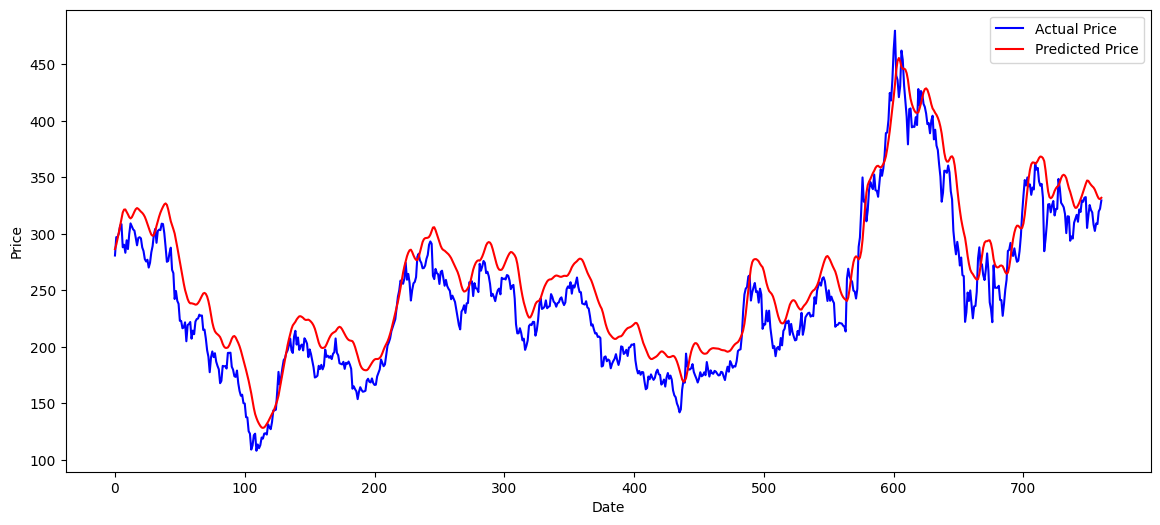

In [21]:
plt.figure(figsize=(14,6))
plt.plot(y_test_rescaled, color="blue", label="Actual Price")
plt.plot(predictions, color="red", label="Predicted Price")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

In [22]:
# Save the model
model.save("tesla_lstm_model.h5")
print("Model saved successfully!")

Model saved successfully!
